# Assignment A1 [35 marks]

The assignment consists of 3 questions. Each exercise may contain coding and/or discussion questions.
- Type your **code** in the **code cells** provided below each question.
- For **non-code** questions, use the **Markdown cells** provided below each question, indicated by 📝. Double-click these cells to edit them, and run them to display your Markdown-formatted text. Please refer to the Week 1 tutorial notebook for Markdown syntax.

---
## Question 1: Estimating $\pi$ [8 marks]

Consider the 3 following formulas:

$$
\begin{align}
(1) \qquad &\prod_{n=1}^\infty \frac{4n^2}{4n^2-1} = \frac{\pi}{2} \\
(2) \qquad &\sum_{n=0}^\infty \frac{2^n n!^2}{(2n+1)!} = \frac{\pi}{2} \\
(3) \qquad &\sum_{n=1}^\infty \frac{(-1)^{n+1}}{n(n+1)(2n+1)} = \pi - 3
\end{align}
$$

Each of these formulas can be used to compute the value of $\pi$ to arbitrary precision, by computing as many terms of the partial sum or product as are required.

**1.1** Compute the sum or product of the first $m$ terms for each formula, with $m = 1, 2, 3, \dots, 30$.

Present your results graphically, using 2 plots, both with the total number of terms on the x-axis.

- The first plot should display the value of the partial sum or product for different numbers of terms, and clearly indicate the exact value of $\pi$ for reference.
- The second plot should display the absolute value of the error between the partial sum or product and $\pi$, with the y-axis set to logarithmic scale.

**[5 marks]**

3.1159482858879586
3.1415926530034817
3.1415842726746206


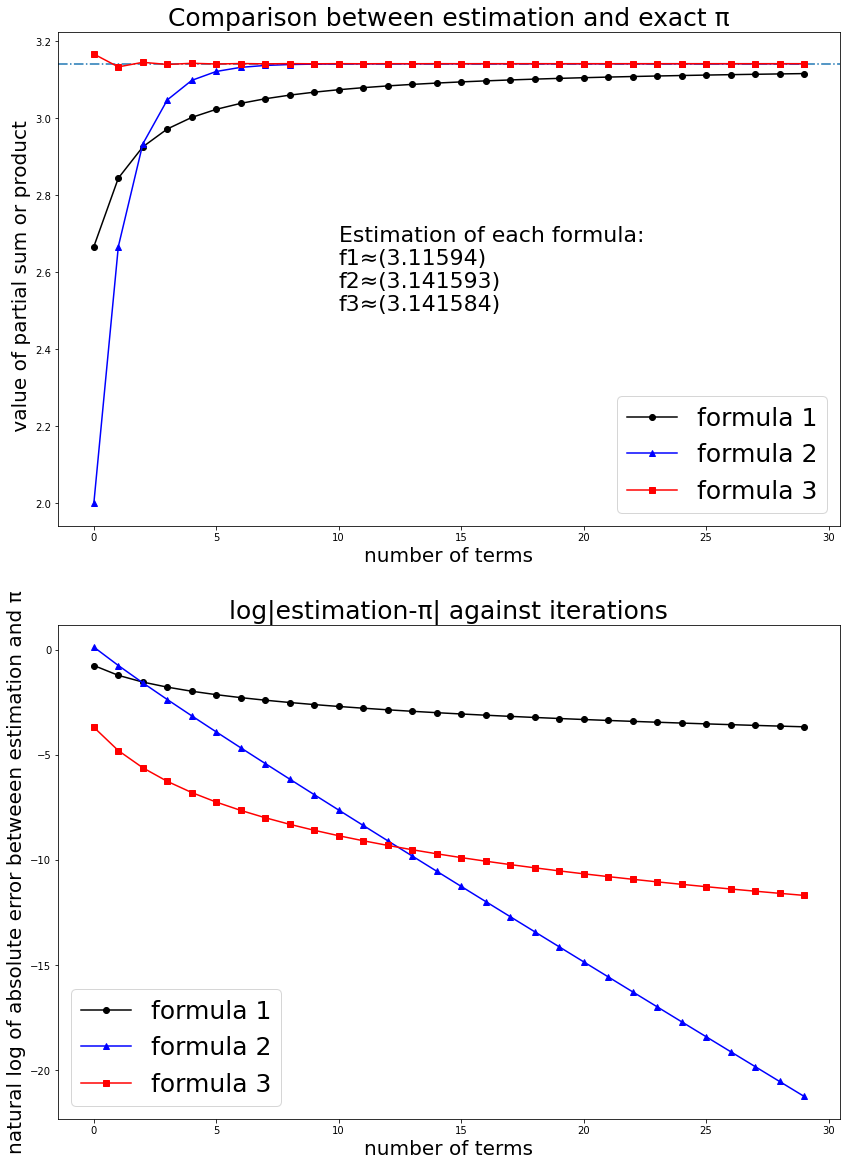

In [107]:
# Import numpy for use np.linspace
import numpy as np
import math

# %matplotlib notebook
import matplotlib.pyplot as plt


# Generate points with even space on x-axis in the interval[1,30] 
x = np.linspace(0,29,30) 


# First m terms 
m = 30




# Generate a list that contains len(x) lists(elements) in it.
f1 = np.zeros(len(x))

# Create a loop from n=0 to n=m
for n in range(m): 
    
    # Initialise the value of y1,which is 4/3
    if n==0:
        f1[0] = 4/3
    else:
        # f1 formula: substitue (n+1) with n becasue it should start at n=1
        f1[n] = f1[n-1] * ((4*((n+1)**2)) / (4*((n+1)**2)-1))





# Generate a list that contains len(x) lists(elements) in it.
f2 = np.zeros(len(x))

# Create a loop from n=0 to n=m
for n in range(m):
    
    # Initialise the value of y2,which is 1
    if n==0:
        f2[0] = 1
    else:
        # f2 formula
        f2[n] = f2[n-1] + ((2**n) * ((math.factorial(n))**2)) / math.factorial(2*n+1)

    


# Generate a list that contains len(x) lists(elements) in it.
f3 = np.zeros(len(x))

# Create a loop from n=0 to n=m    
for n in range(m):
    
     # Initialise the value of y3,which is 1/6
    if n==0:
        f3[0] = 1/6
    else:
        # f3 formula: substitue (n+1) with n becasue it should start at n=1
        f3[n] = f3[n-1] + ((-1)**(n+1+1)) / ((n+1)*(n+1+1)*(2*(n+1)+1))
    
    

        
# Create a figure with 2 subplots
fig, ax = plt.subplots(2,1)

# Make the two subplots with larger scale and clear to see
fig.set_size_inches(14,20)


# Plot y = pi, a constant line acrosses y-axis
ax[0].axhline(math.pi,ls='-.')
# Label x and y-axis
ax[0].set_xlabel('number of terms',fontsize = 20)
ax[0].set_ylabel(' value of partial sum or product',fontsize = 20)
# Give a title for the first plot
ax[0].set_title("Comparison between estimation and exact π",fontsize = 25)


print(f1[29]*2)
print(f2[29]*2)
print(f3[29]+3)
# Text that shows that the value of estimation of π for each formula
ax[0].text(10, 2.5, 'Estimation of each formula: \nf1≈(3.11594)\nf2≈(3.141593)\nf3≈(3.141584)', fontsize = 22)

# Plot the 3 formulas on one plot with differentiated colors
handle1,=ax[0].plot(x, f1*2,color='k',marker='o')
handle2,=ax[0].plot(x, f2*2,color='b',marker='^')
handle3,=ax[0].plot(x, f3+3,color='r',marker='s')


# Show details of what each line represents in words 
ax[0].legend(handles=[handle1,handle2,handle3],labels=['formula 1','formula 2','formula 3'],fontsize=25)


# Plot the 3 formulas in logarithmic scale on one plot with differentiated colors
ax[1].plot(x,np.log(abs(f1*2-(np.pi))),color='k',marker='o')
ax[1].plot(x,np.log(abs(f2*2-(np.pi))),color='b',marker='^')
ax[1].plot(x,np.log(abs(f3+3-(np.pi))),color='r',marker='s')
# Give a title for the second plot
ax[1].set_title("log|estimation-π| against iterations",fontsize = 25)
ax[1].set_xlabel('number of terms',fontsize = 20)
ax[1].set_ylabel('natural log of absolute error betweeen estimation and π',fontsize = 20)
ax[1].legend(handles=[handle1,handle2,handle3],labels=['formula 1','formula 2','formula 3'],fontsize=25)

plt.show()





**1.2** If you did not have access to e.g. `np.pi` or `math.pi`, which of these 3 formulas would you choose to efficiently calculate an approximation of $\pi$ accurate to within any given precision (down to machine accuracy -- i.e. not exceeding $\sim 10^{-16}$)?

Explain your reasoning in your own words, with reference to your plots from **1.1**, in no more than 200 words.

**[3 marks]**

Formula 2 is the most efficient way of calculating an approximation of pi since the absolute error is decreasing constantly with a relatively large gradient compared with the other two formulas. It does not converge in the interval[0,30] These two facts tell me that using formula 2, the difference between the estimation and true value of pi will become Negligibly small in the end.

The other two formulas are experiencing similar trend in the whole process: converging over time. The errors are still quite obvious at the end of the plot.

Another interesting point is that although the formula 2 is quite far from the actual value of pi at first, its approximation finally exceeds the other two approximation. 


---
## Question 2: Numerical Linear Algebra [12 marks]

A **block-diagonal matrix** is a square matrix with square blocks of non-zero values along the diagonal, and zeros elsewhere. For example, the following matrix A is an example of a block-diagonal matrix of size $7\times 7$, with 3 diagonal blocks of size $2\times 2$, $3\times 3$, and $2 \times 2$ respectively:

$$
A =
\begin{pmatrix}
1 & 3 & 0 & 0 & 0 & 0 & 0 \\
2 & 2 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & -1 & 1 & 2 & 0 & 0 \\
0 & 0 & 2 & 1 & 0 & 0 & 0 \\
0 & 0 & 4 & 3 & 3 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 4 & -2 \\
0 & 0 & 0 & 0 & 0 & 5 & 3
\end{pmatrix}.
$$


**2.1** The code below creates a block-diagonal matrix with random non-zero values between 0 and 1, where all blocks have identical size. Study the following documentation sections:

- [`scipy.linalg.block_diag()` - SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.block_diag.html)
- [`numpy.split()` - NumPy documentation](https://numpy.org/doc/stable/reference/generated/numpy.split.html)
- [Unpacking Argument Lists - Python tutorial](https://docs.python.org/3/tutorial/controlflow.html#unpacking-argument-lists)

Then, write detailed code comments in the cell below to explain **each line** of code, in your own words.

**[3 marks]**

In [38]:
# For use of random, round and split function from numpy module 
import numpy as np

# For use of block_diag function
from scipy.linalg import block_diag

# define random_blocks of matrix with m number of given shaped(row and column) random matrices 
def random_blocks(m, shape):
    '''
    Returns a list of m random matrices of size shape[0] x shape[1].
    '''

    # Create random matrix that each element with random float in the half-open interval [0.0, 1.0)
    mat = np.random.random([m * shape[0], shape[1]])

    # Using np.split function to split matrix(mat) into m parts  
    blocks = np.split(mat, m)
    
    return blocks


# Generate a matrix with 4 matrices of shape 3*2(3 rows & 2 columns)
blocks = random_blocks(4, (3, 2))

# Use block_diag function to put the above 4 matrices into diagnal of a whole zero matrix
A = block_diag(*blocks)

# Round each element of A to 3 decimal places
print(np.round(A, 3))


[[0.649 0.179 0.    0.    0.    0.    0.    0.   ]
 [0.271 0.885 0.    0.    0.    0.    0.    0.   ]
 [0.053 0.537 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.869 0.412 0.    0.    0.    0.   ]
 [0.    0.    0.727 0.028 0.    0.    0.    0.   ]
 [0.    0.    0.697 0.031 0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.133 0.24  0.    0.   ]
 [0.    0.    0.    0.    0.764 0.687 0.    0.   ]
 [0.    0.    0.    0.    0.806 0.285 0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.326 0.681]
 [0.    0.    0.    0.    0.    0.    0.607 0.048]
 [0.    0.    0.    0.    0.    0.    0.095 0.42 ]]


**2.2** For the rest of Question 2, we consider only block-diagonal matrices with $m$ blocks, where all diagonal blocks have the same shape $n \times n$. A block-diagonal system $Ax = b$ can be written as

$$
\begin{pmatrix}
A_{1} & & & \\
& A_{2} & & \\
& & \ddots & \\
& & & A_{m}
\end{pmatrix}
\begin{pmatrix}
x_1 \\ x_2 \\ \vdots \\ x_m
\end{pmatrix}
=
\begin{pmatrix}
b_1 \\ b_2 \\ \vdots \\ b_m
\end{pmatrix}
\qquad \Leftrightarrow \qquad
\begin{cases}
A_{1} x_1 &= b_1 \\
A_{2} x_2 &= b_2 \\
&\vdots \\
A_{m} x_m &= b_m
\end{cases},
$$

where $A_i$ is the $i$th diagonal block of $A$, and $x_i$, $b_i$ are blocks of length $n$ of the vectors $x$ and $b$ respectively, for $i=1, 2, \dots, m$. Note that when $m=1$, this is a diagonal system.

We assume that all diagonal blocks $A_i$ are invertible, and therefore that the matrix $A$ is also invertible.

Write a function `linsolve_block_diag(blocks, b)` which takes 2 input arguments:

- `blocks`, a list of length $m$ storing a collection of $n \times n$ NumPy arrays (e.g. as returned by `random_blocks()` from **2.1**) representing the blocks $A_i$,
- a NumPy vector `b` of length $mn$.

Your function should solve the block-diagonal system $Ax = b$, by solving **each sub-system $A_i x_i = b_i$ separately**, and return the solution as a NumPy vector `x` of length $mn$. You should choose an appropriate method seen in the course (e.g. `np.linalg.solve()`) to solve each sub-system.

**[3 marks]**

In [39]:
import numpy as np

def linsolve_block_diag(blocks, b):
    '''
    Solves the block-diagonal system Ax=b,
    where the diagonal blocks are listed in "blocks".

    '''
    # Blocks, a list of length  𝑚  
    m = len(blocks)
    

    # Split the vector b into m subarrays
    b = np.array_split(b,m)
    
    
    # n = the length of the first element of splitted b arrays
    n=len(b[0])
    
    # Create a list with number m*n's zero in it.
    x = np.zeros(m*n)
    
    # Create a loop from i=0 to i=m
    for i in range(m):
    # Remove single-dimensional entries from the shape of the array
        x[i*n:(i+1)*n] = np.squeeze(np.linalg.solve(blocks[i],np.expand_dims(b[i],1)))
    
    return x


# Test
blocks = random_blocks(4, (3, 3))
b=np.random.random(4*3)

# Result
print(linsolve_block_diag(blocks,b))






    
    
    
    
    

    
    
    


[ 1.29440897e+00  8.55934924e-01 -6.50110065e-01  2.14734547e+02
 -1.96639158e+03  1.31166119e+03  1.69643625e+00 -2.55197820e+00
  3.33231866e-01  9.05610567e-02  1.10065694e+00  5.92286763e-01]


**2.3** We now wish to compare the computation time needed to solve a block-diagonal system $Ax = b$ using 2 different methods:

- solving the sub-systems one at a time, as in **2.2**,
- solving the full system with a general method, not attempting to take the block-diagonal structure into account.

Consider block-diagonal systems with block sizes $n = 5, 10, 15, 20$, and a total number $m = 5, 10, 15, \dots, 40$ of blocks. For each combination of $n$ and $m$:

- Use the function `random_blocks()` from **2.1** to generate a list of $m$ random matrices of size $n\times n$.
- Use the function `np.random.random()` to generate a random vector `b` of length $mn$.
- Use your function `linsolve_block_diag()` from **2.2** to solve the system $Ax = b$, where $A$ is a block-diagonal matrix of size $mn \times mn$, with diagonal blocks given by the output of `random_blocks()`. Measure the computation time needed to solve the system.
- Use the function `block_diag()` from `scipy.linalg` to form a NumPy array `A` of size $mn \times mn$, representing the block-diagonal matrix $A$.
- Solve the full system $Ax = b$, using the same method you used in **2.2** for each individual sub-system. Measure the computation time needed to solve the system.

Create 4 plots, one for each value of $n$, to compare the computation time needed to solve $Ax=b$ with both methods, and how this varies with the total size of the system.

Summarise and discuss your observations in no more than 200 words.

**[6 marks]**

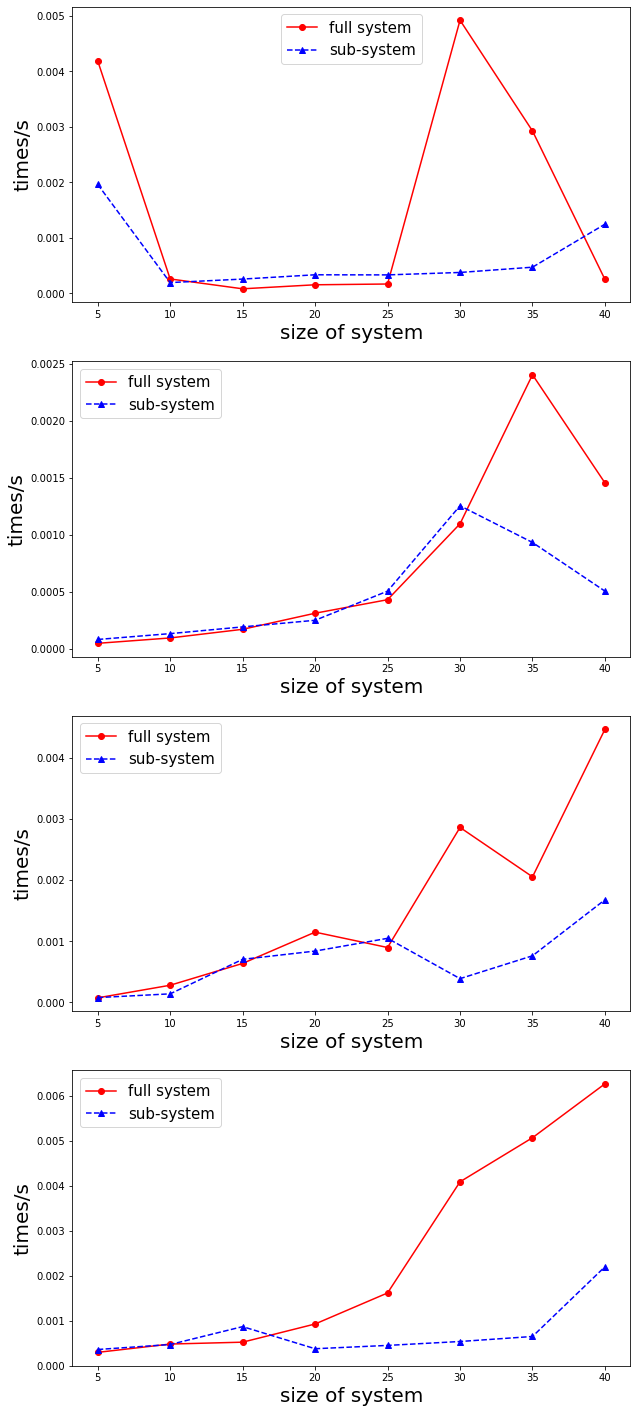

In [111]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Create the list of block sizes[5,10,15,20] and use np.linspace to simplify the list
ns = np.linspace(5,20,4, dtype=int)
# Create the list of total number[5,10,15,20,25,30,35,40] and use np.linspace to simplify the list
ms = np.linspace(5,40,8, dtype=int)
# Generate a empty list(blue) that has length of the block sizes
tb = [None] * len(ns)
# empty list(yellow)
ty = [None] * len(ns)

# Create a loop from i=0 to i=len(ns)
for i in range(len(ns)):
    tb[i] = np.zeros(len(ms))
    ty[i] = np.zeros(len(ms))



# Create a loop from i=0 to i=len(ns)
for i in range(len(ns)):
    # Create a loop from j=0 to j=len(ms)
    for j in range(len(ms)):
    
        # Generate a matrix with j element of list of ms matrices of shape (ith element of ns, ith element of ns)
        blocks = random_blocks(ms[j], (ns[i], ns[i]))
        # Generate a random matrix with shape (ns[i]*ms[j])
        b=np.random.random(ns[i]*ms[j])
        # Start 1st time function 
        t0=time.time()
        # Inserting the expected function 
        x = linsolve_block_diag(blocks,b)
        # End time function and minus the initial time to calculate the time that runs the above code
        tb[i][j] = time.time() - t0
        
        
        
        # Generate a random matrix with shape (ms[j]*ns[i],ms[j]*ns[i])
        A = np.random.random((ms[j]*ns[i],ms[j]*ns[i]))
        # Generate a random matrix with shape (ns[i]*ms[j])
        b = np.random.random(ns[i]*ms[j])
        # Start 2nd time function 
        t0 = time.time()
        # Inserting the expected function
        x = np.linalg.solve(A,np.expand_dims(b,1))
        # End time function and minus the initial time to calculate the time that runs the above code
        ty[i][j] = time.time() - t0
            
    
    
# Plot 4 subgraphs in 4 rows
fig,ax = plt.subplots(4,)
# Increase the scale of the plots
fig.set_size_inches(10,25)

# Create a loop from i=0 to i=len(ns)
for i in range(len(ns)):
    
    # Set name for x axis
    ax[i].set_xlabel('size of system',fontsize = 20)
    # Set name for y axis
    ax[i].set_ylabel('times/s',fontsize = 20)
    # Plot size of system against time for two methods of calculating
    handle1,=ax[i].plot(ms,ty[i],color='r',linestyle='-',marker='o')
    handle2,=ax[i].plot(ms,tb[i],color='b',linestyle='--',marker='^')
    # Label the information represented by each colored line
    ax[i].legend(handles=[handle1,handle2],labels=['full system','sub-system'],fontsize=15)
    
  
    
    
    



    


(1) Compared with the sub-system algorithm, the full system algorithm has better time complexity;

(2) When the scale of the problem increases, the time complexity of both algorithms will increase. However, the full system formula increases in square and the sub-system algorithm increases in linear. Therefore, in the case of large n, the latter is more appropriate.

(3) According the subplot 4, the seperately calculated formula increases sharply in the interval(25,40) and remains increasing after 35, this is because for our DIY formula, it takes shorter time solving easy matrics, but for more complexed ones, the time recurring the loop will be increasingly longer as size of system increase. For the linsolve_block_diag(blocks,b), it actually ignores the zero element in the diagnal matrix. 




---
## Question 3: Numerical Integration [15 marks]

The integral of the function $f(x,y)= \sin(x) \cos\left(\frac{y}{5}\right)$ defined on the rectangle $\mathcal{D}\in\mathbb{R}^2 = (a,b)\times(c,d)$
can be expressed in closed form as

$$
I = \int_c^{d}\int_a^{b}  \sin(x)\cos\left(\frac{y}{5}\right) \ dx \ dy = 5\left(-\cos(b) + \cos(a)\right)\left(\sin\left(\frac{d}{5}\right) - \sin\left(\frac{c}{5}\right)\right).
$$

for any $a<b$ and $c<d$.

**3.1** Create a surface plot of the function $f(x,y)$ on the interval $(-5, 5) \times (-5, 5)$.

**[3 marks]**

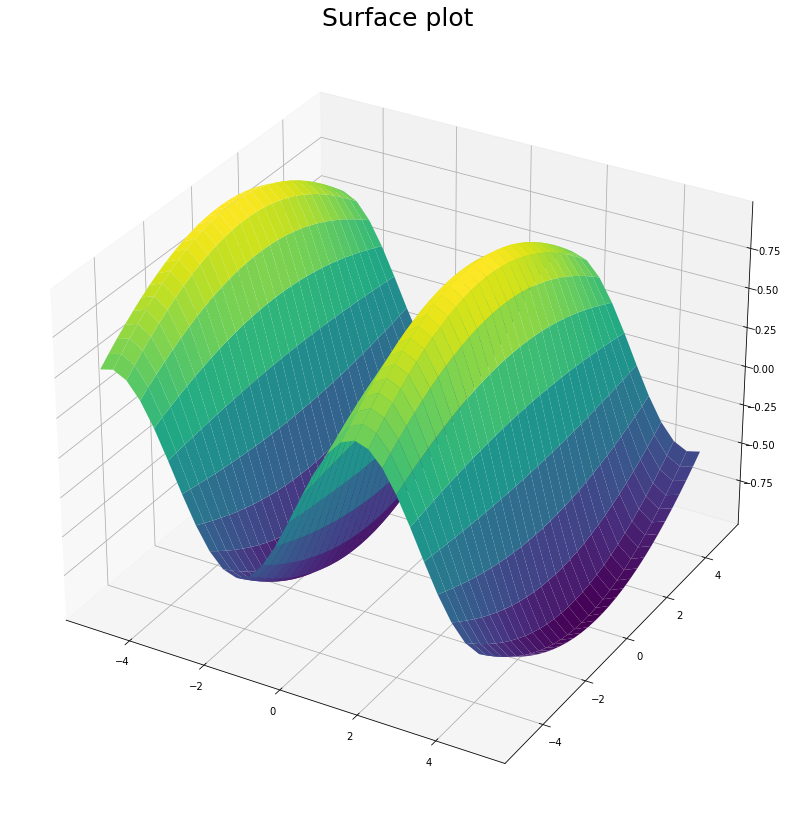

In [36]:
from mpl_toolkits import mplot3d
import numpy as np
import scipy as s
import matplotlib.pyplot as plt

x = np.outer(np.linspace(-5, 5, 30), np.ones(30))
y = x.copy().T # transpose
#f = lambda y, x: np.sin(x)*np.cos(y/5)
#I = s.integrate.dblquad(f, 0, 2, lambda x: 0, lambda x: 1)
#I = s.integrate.dblquad
I = np.sin(x)*np.cos(y/5)

# Plot the figure
fig = plt.figure()
fig.set_size_inches(14,20)
# Plot 3-dimension axis
ax = plt.axes(projection='3d')

# Surface plot function 
ax.plot_surface(x, y, I,cmap='viridis', edgecolor='none')
# Label the title of the graph
ax.set_title('Surface plot',fontsize=25)
plt.show()

**3.2** Write a function `midpoint_I(D, N, M)` which takes 4 input arguments:

- a list `D` of length 4, to store the 4 interval bounds $a, b, c, d$,
- a positive integer `N`,
- a positive integer `M`,

and implements the 2D composite midpoint rule to compute and return an approximation of $I$, partitioning the rectangle $\mathcal{D}$ into $N\times M$ rectangles. (This translates to `N` nodes on the x-axis and `M` nodes on the y-axis.

You will need to adapt the 1D composite midpoint rule seen in Weeks 5 and 6 to extend it to 2 dimensions. Instead of approximating the integral by computing the sum of the surface areas of $N$ rectangles, you will need to sum the volumes of $N \times M$ cuboids.

**[3 marks]**

In [37]:
import numpy as np
def midpoint_I(D, N, M):
    '''
    Returns an estimation of the integral of f over [a, b]
    using the midpoint rule with N intervals.
    '''
    # Define D(a list that store 4 elements)
    a,b,c,d = D[0],D[1],D[2],D[3]
   
    # Calculate the nodes
    dx = (D[1] - D[0]) / N
    dy = (D[3] - D[2]) / M
    
    # Initialize I
    I = 0
    
    # Generate a loop from j=0 to j=N
    for i in range(N):
        
       
    # Generate a loop from i=0 to i=M        
        for j in range(M):
           
            # Present x and y function where c and a is the initial value of the function
            y = c + dy/2 + j*dy
            x = a + dx/2 + i*dx
            
            # Generate the function of I    
            I =  I + (np.sin(x)*np.cos(y/5)) * dx * dy
            
            
    return  I


# Check with exact values
print(midpoint_I([7,8,9,10],2000,2000))
print(5*(-np.cos(8)+np.cos(7))*(np.sin(10/5)-np.sin(9/5)))

-0.29028300927225487
-0.29028300612751906


**3.3** Consider now the domain $\mathcal{D} = (0, 5)\times(0, 5)$. Compute the absolute error between the exact integral $I$ and the approximated integral computed with your `midpoint_I()` function from **3.2**, with all combinations of $M = 5, 10, 15, \dots, 300$ and $N = 5, 10, 15, \dots, 300$.

Store the error values in a $60\times 60$ NumPy array.

**[3 marks]**

In [26]:
import numpy as np

# Set value of elements in D

# lower bound of domains
a=c=0
# upper bound of domains
b=d=5
# Create a list that contains limits of domains for dx and dy
D = [a,b,c,d]

# Create ns and ms which are the lists with all combinations of  𝑀=5,10,15,…,300  and  𝑁=5,10,15,…,300,using linspace to seperate elements in equal sapce
Ns = np.linspace(5,300,60,dtype = int)
Ms = np.linspace(5,300,60,dtype = int)
# The height values over which the contour is drawn.
h = np.zeros([len(ns),len(ms)])

# Generate loop of each n in ns
for n in Ns:
    # Generate loop of each m in ms
    for m in Ms:
    
        approximation_I = midpoint_I(D,n,m)

        exact_I =  5*(-np.cos(b)+np.cos(a))*(np.sin(d/5)-np.sin(c/5))
    
        h[int(n/5)-1][int(m/5)-1] = abs(approximation_I-exact_I)
    






**3.4** Display the absolute error values as a function of $N$ and $M$ using a contour plot, with contour levels at $10^{-k}, k = 1, 2, \dots, 5$.

You may find the documentation for [`contour()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html#matplotlib.pyplot.contour), [`contourf()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf), and [colormap normalization](https://matplotlib.org/stable/tutorials/colors/colormapnorms.html#logarithmic) useful to clearly display your results.

**[3 marks]**

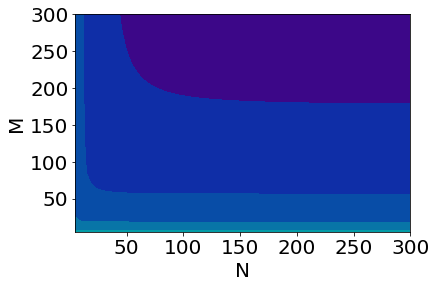

In [33]:
from matplotlib import cm




# Plot using the contourf function with contour levels (10−𝑘,𝑘=1,2,…,5)
cs = plt.contourf(Ns,Ms,h,levels=[10e-05,10e-04,10e-03,10e-02,10e-01],colors=['#0F2EA7','#084DA7','#0875A7','#039CA7','#05A79A'],extend = 'both')

# color that exceeds the highest contour line
cs.cmap.set_over('#185F88')
# color that below the lowest contour line
cs.cmap.set_under('#3C0788')




# Label the sticks of each value on the x-axis and y-axis
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# Label the x & y axis
plt.xlabel('N',fontsize = 20)
plt.ylabel('M',fontsize = 20)
cs.changed()

#show the graph
plt.show()



**3.5** Summarise and explain your observations from **3.4** in no more than 250 words. In particular, discuss how $\mathcal{D}$ should be partitioned to approximate $I$ with an error of at most $10^{-4}$, and comment on the symmetry or asymmetry of the partitioning.

**[3 marks]**

The error decreases as M and N increase as much as possible. This also shows that the smaller the area, the less error it gives.

By comparing with sin(x) and cos(y/5), if the precision of sin(x) wants to be approached to cos(x/5) there should be more points added to implement it. We can also see that m let the rate of decrease of error be more obvious. Therefore if we want to minimize the error, we should input as many points as we can.

If D should be partitioned to approximate I with an error of at most 10−4, from the lower purple edge, we can conclude that N should be approaching approximately 60 or lower while M should be approaching about 200 or higher.

About the symmetry: From the graph, we can see that the symmetry area shows that the less the coutour level, there is more symmetry trend shown and vice versa.
